# Forecasting and analysis of Solar Power Generation


This project has a goal to analyse the dataset "Solar power generation data" from Kaggle and at the end use statistical models for forecasting. 


# Importing Libs for the project 


In [44]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.tsa.stattools as sts 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import sqrt
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset from csv file


In [8]:
sol_dataset = pd.read_csv('C:\\Dataset'
                          '\\SOLARDATASET'
                          '\\Plant_1_Generation_Data.csv',sep=',')

weather_dataset = pd.read_csv('C:\\Dataset'
                          '\\SOLARDATASET'
                          '\\Plant_1_Weather_Sensor_Data.csv',sep=',')

In [9]:
sol_dataset

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


# Transform Data


In [10]:
print(sol_dataset.dtypes)
sol_datasetG = sol_dataset.drop(['SOURCE_KEY'],axis = 1)
print(sol_datasetG)

DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object
              DATE_TIME  PLANT_ID  DC_POWER  AC_POWER  DAILY_YIELD  \
0      15-05-2020 00:00   4135001       0.0       0.0        0.000   
1      15-05-2020 00:00   4135001       0.0       0.0        0.000   
2      15-05-2020 00:00   4135001       0.0       0.0        0.000   
3      15-05-2020 00:00   4135001       0.0       0.0        0.000   
4      15-05-2020 00:00   4135001       0.0       0.0        0.000   
...                 ...       ...       ...       ...          ...   
68773  17-06-2020 23:45   4135001       0.0       0.0     5967.000   
68774  17-06-2020 23:45   4135001       0.0       0.0     5147.625   
68775  17-06-2020 23:45   4135001       0.0       0.0     5819.000   
68776  17-06-2020 23:45   4135001       0.0       0.0     5817.000   
68777  17-06-2020 23:45   4135001       0.0       0.0  

In [11]:
sol_datasetG['DATE_TIME'] = pd.to_datetime(sol_datasetG['DATE_TIME'],format='%d-%m-%Y %H:%M' )
sol_datasetG

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,0.0,0.0,5817.000,6583369.0


In [12]:
sol_datasetG = sol_datasetG.groupby(['DATE_TIME']).sum().reset_index()
sol_datasetG

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,86835021,0.0,0.0,0.000000,143581676.0
1,2020-05-15 00:15:00,86835021,0.0,0.0,0.000000,143581676.0
2,2020-05-15 00:30:00,86835021,0.0,0.0,0.000000,143581676.0
3,2020-05-15 00:45:00,86835021,0.0,0.0,0.000000,143581676.0
4,2020-05-15 01:00:00,90970022,0.0,0.0,0.000000,150761642.0
...,...,...,...,...,...,...
3153,2020-06-17 22:45:00,90970022,0.0,0.0,129571.000000,156142755.0
3154,2020-06-17 23:00:00,90970022,0.0,0.0,129571.000000,156142755.0
3155,2020-06-17 23:15:00,90970022,0.0,0.0,129571.000000,156142755.0
3156,2020-06-17 23:30:00,90970022,0.0,0.0,129571.000000,156142755.0


In [13]:
print(sol_datasetG['DATE_TIME'].dtypes)

datetime64[ns]


In [14]:
sol_datasetG['DATE_'] = sol_datasetG['DATE_TIME'].dt.strftime('%Y-%m-%d')
sol_datasetG['TIME'] = sol_datasetG['DATE_TIME'].dt.strftime('%H:%M')
sol_datasetG

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_,TIME
0,2020-05-15 00:00:00,86835021,0.0,0.0,0.000000,143581676.0,2020-05-15,00:00
1,2020-05-15 00:15:00,86835021,0.0,0.0,0.000000,143581676.0,2020-05-15,00:15
2,2020-05-15 00:30:00,86835021,0.0,0.0,0.000000,143581676.0,2020-05-15,00:30
3,2020-05-15 00:45:00,86835021,0.0,0.0,0.000000,143581676.0,2020-05-15,00:45
4,2020-05-15 01:00:00,90970022,0.0,0.0,0.000000,150761642.0,2020-05-15,01:00
...,...,...,...,...,...,...,...,...
3153,2020-06-17 22:45:00,90970022,0.0,0.0,129571.000000,156142755.0,2020-06-17,22:45
3154,2020-06-17 23:00:00,90970022,0.0,0.0,129571.000000,156142755.0,2020-06-17,23:00
3155,2020-06-17 23:15:00,90970022,0.0,0.0,129571.000000,156142755.0,2020-06-17,23:15
3156,2020-06-17 23:30:00,90970022,0.0,0.0,129571.000000,156142755.0,2020-06-17,23:30


# Data Exploratory Analysis

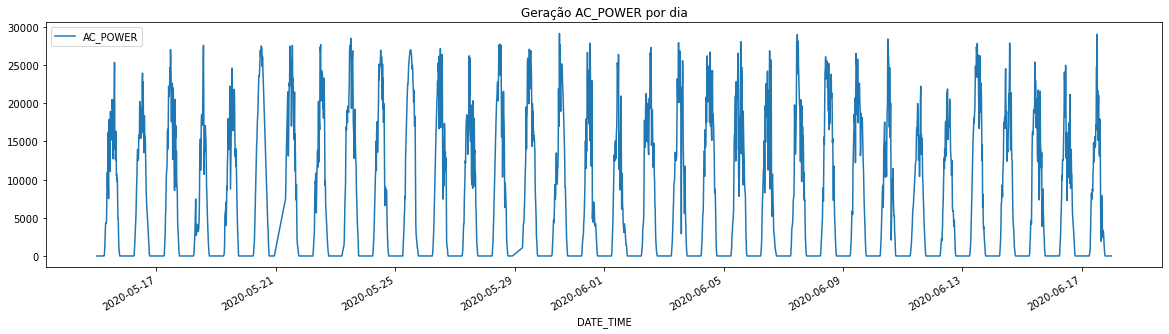

In [17]:
sol_datasetG.plot( y='AC_POWER',x='DATE_TIME', style= '-',legend=True,figsize=(20,5))
plt.title("Geração AC_POWER por dia")
plt.show()


Text(0.5, 1.0, 'Geração durante dia 2020-05-15')

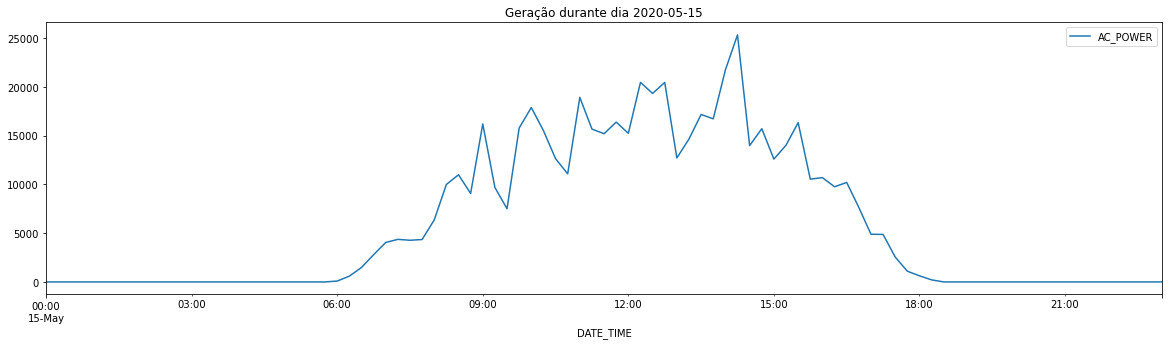

In [18]:
sol_datasetG[sol_datasetG['DATE_'] == '2020-05-15'].plot( y='AC_POWER',x='DATE_TIME', style= '-',legend=True,figsize=(20,5))
plt.title('Geração durante dia 2020-05-15')

In [19]:
weather_dataset
weather_dataset['DATE_TIME'] = pd.to_datetime(weather_dataset['DATE_TIME'],format='%Y-%m-%d %H:%M' )

In [20]:
print(weather_dataset.dtypes)

DATE_TIME              datetime64[ns]
PLANT_ID                        int64
SOURCE_KEY                     object
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object


In [21]:
df_solar_weather = pd.merge(sol_datasetG,weather_dataset,on='DATE_TIME')
df_solar_weather.sample(10)

,DATE_TIME,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_,TIME,PLANT_ID_y,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1676,2020-06-02 13:00:00,90970022,272950.946430,26622.589286,95876.392856,1.537428e+08,2020-06-02,13:00,4135001,HmiyD2TTLFNqkNe,27.964561,48.282782,0.885264
1479,2020-05-31 11:45:00,90970022,176738.874999,17281.048214,68220.160714,1.534565e+08,2020-05-31,11:45,4135001,HmiyD2TTLFNqkNe,29.273012,51.366606,0.518191
1754,2020-06-03 08:30:00,90970022,99424.750001,9759.312500,12194.107143,1.538211e+08,2020-06-03,08:30,4135001,HmiyD2TTLFNqkNe,25.202730,34.808234,0.311420
1409,2020-05-30 18:15:00,90970022,6327.357143,611.382143,158979.964285,1.533882e+08,2020-05-30,18:15,4135001,HmiyD2TTLFNqkNe,28.536003,27.203674,0.019436
340,2020-05-18 15:45:00,90970022,154637.589285,15143.798214,103413.803571,1.513097e+08,2020-05-18,15:45,4135001,HmiyD2TTLFNqkNe,27.814183,43.054219,0.496169
607,2020-05-22 00:00:00,90970022,0.000000,0.000000,3830.500000,1.518380e+08,2020-05-22,00:00,4135001,HmiyD2TTLFNqkNe,23.760593,21.235205,0.000000
2475,2020-06-10 21:00:00,90970022,0.000000,0.000000,141696.000000,1.551373e+08,2020-06-10,21:00,4135001,HmiyD2TTLFNqkNe,22.296842,21.241884,0.000000
23,2020-05-15 05:45:00,86835021,0.000000,0.000000,0.000000,1.435817e+08,2020-05-15,05:45,4135001,HmiyD2TTLFNqkNe,24.289211,23.096692,0.000863
1373,2020-05-30 09:15:00,90970022,119132.839285,11679.489286,16812.035714,1.532460e+08,2020-05-30,09:15,4135001,HmiyD2TTLFNqkNe,24.408232,34.409900,0.371122
1577,2020-06-01 12:15:00,90970022,151830.428570,14862.948214,83619.482143,1.536031e+08,2020-06-01,12:15,4135001,HmiyD2TTLFNqkNe,29.655046,49.082857,0.619743


In [22]:
df_solar_weather[(df_solar_weather['DATE_TIME']<= '2020-05-16 00:00:00') & (df_solar_weather['DATE_TIME']>= '2020-05-15 00:00:00')]

,DATE_TIME,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_,TIME,PLANT_ID_y,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,86835021,0.0,0.0,0.0,143581676.0,2020-05-15,00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,86835021,0.0,0.0,0.0,143581676.0,2020-05-15,00:15,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,86835021,0.0,0.0,0.0,143581676.0,2020-05-15,00:30,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,86835021,0.0,0.0,0.0,143581676.0,2020-05-15,00:45,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,90970022,0.0,0.0,0.0,150761642.0,2020-05-15,01:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2020-05-15 22:00:00,90970022,0.0,0.0,87463.0,150899115.0,2020-05-15,22:00,4135001,HmiyD2TTLFNqkNe,22.221858,20.895704,0.0
89,2020-05-15 22:15:00,90970022,0.0,0.0,87463.0,150899115.0,2020-05-15,22:15,4135001,HmiyD2TTLFNqkNe,22.149313,20.732186,0.0
90,2020-05-15 22:30:00,90970022,0.0,0.0,87463.0,150899115.0,2020-05-15,22:30,4135001,HmiyD2TTLFNqkNe,22.104714,20.829852,0.0
91,2020-05-15 22:45:00,90970022,0.0,0.0,87463.0,150899115.0,2020-05-15,22:45,4135001,HmiyD2TTLFNqkNe,22.057080,21.072276,0.0


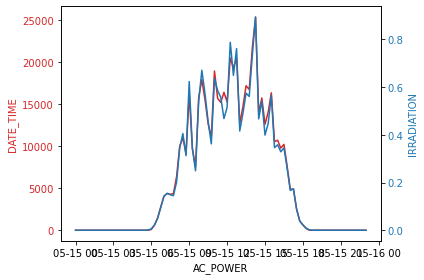

In [23]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('AC_POWER')
ax1.set_ylabel('DATE_TIME', color=color)
ax1.plot(
  df_solar_weather[(df_solar_weather['DATE_TIME']<= '2020-05-16 00:00:00') & (df_solar_weather['DATE_TIME']>= '2020-05-15 00:00:00')]['DATE_TIME']
, df_solar_weather[(df_solar_weather['DATE_TIME']<= '2020-05-16 00:00:00') & (df_solar_weather['DATE_TIME']>= '2020-05-15 00:00:00')]['AC_POWER'], color=color)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('IRRADIATION', color=color)  # we already handled the x-label with ax1
ax2.plot(
    df_solar_weather[(df_solar_weather['DATE_TIME']<= '2020-05-16 00:00:00') & (df_solar_weather['DATE_TIME']>= '2020-05-15 00:00:00')]['DATE_TIME']
, df_solar_weather[(df_solar_weather['DATE_TIME']<= '2020-05-16 00:00:00') & (df_solar_weather['DATE_TIME']>= '2020-05-15 00:00:00')]['IRRADIATION'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

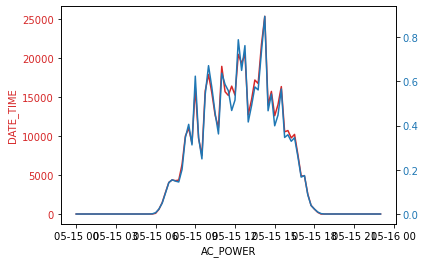

In [24]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('AC_POWER')
ax1.set_ylabel('DATE_TIME', color=color)
ax1.plot(
  df_solar_weather[(df_solar_weather['DATE_'] == '2020-05-15')]['DATE_TIME']
, df_solar_weather[(df_solar_weather['DATE_'] == '2020-05-15')]['AC_POWER'], color=color)

ax1.tick_params(axis='y', labelcolor=color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.plot(
  df_solar_weather[(df_solar_weather['DATE_'] == '2020-05-15')]['DATE_TIME']
, df_solar_weather[(df_solar_weather['DATE_'] == '2020-05-15')]['IRRADIATION'], color=color)

ax2.tick_params(axis='y', labelcolor=color)


#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [25]:
df_solar_weather_dc = df_solar_weather.pivot_table(values='DC_POWER', index='TIME', columns='DATE_')
df_solar_weather_dc

DATE_,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19,2020-05-20,2020-05-21,2020-05-22,2020-05-23,2020-05-24,...,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17
TIME,,,,,,,,,,,,,,,,,,,,,
00:00,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:15,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:30,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00:45,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01:00,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23:00,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23:15,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
def plot_manyplots(row = None, col = None, title1 = None, title2 = None):
    df_solar_weather_manyplots1 = df_solar_weather.pivot_table(values=title1, index='TIME', columns='DATE_')
    df_solar_weather_manyplots2 = df_solar_weather.pivot_table(values=title2, index='TIME', columns='DATE_')
    cols =  df_solar_weather_manyplots1.columns
    gp = plt.figure(figsize = [20,40])
    gp.subplots_adjust(wspace=0.2, hspace=1.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        df_solar_weather_manyplots1[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title1, cols[i-1]),color='blue')
        ax2 = ax.twinx()
        df_solar_weather_manyplots2[cols[i-1]].plot(ax=ax2, color='blue')
        #ax2.plot(df_solar_weather_manyplots2[cols[i-1]])
        #ax2.plot


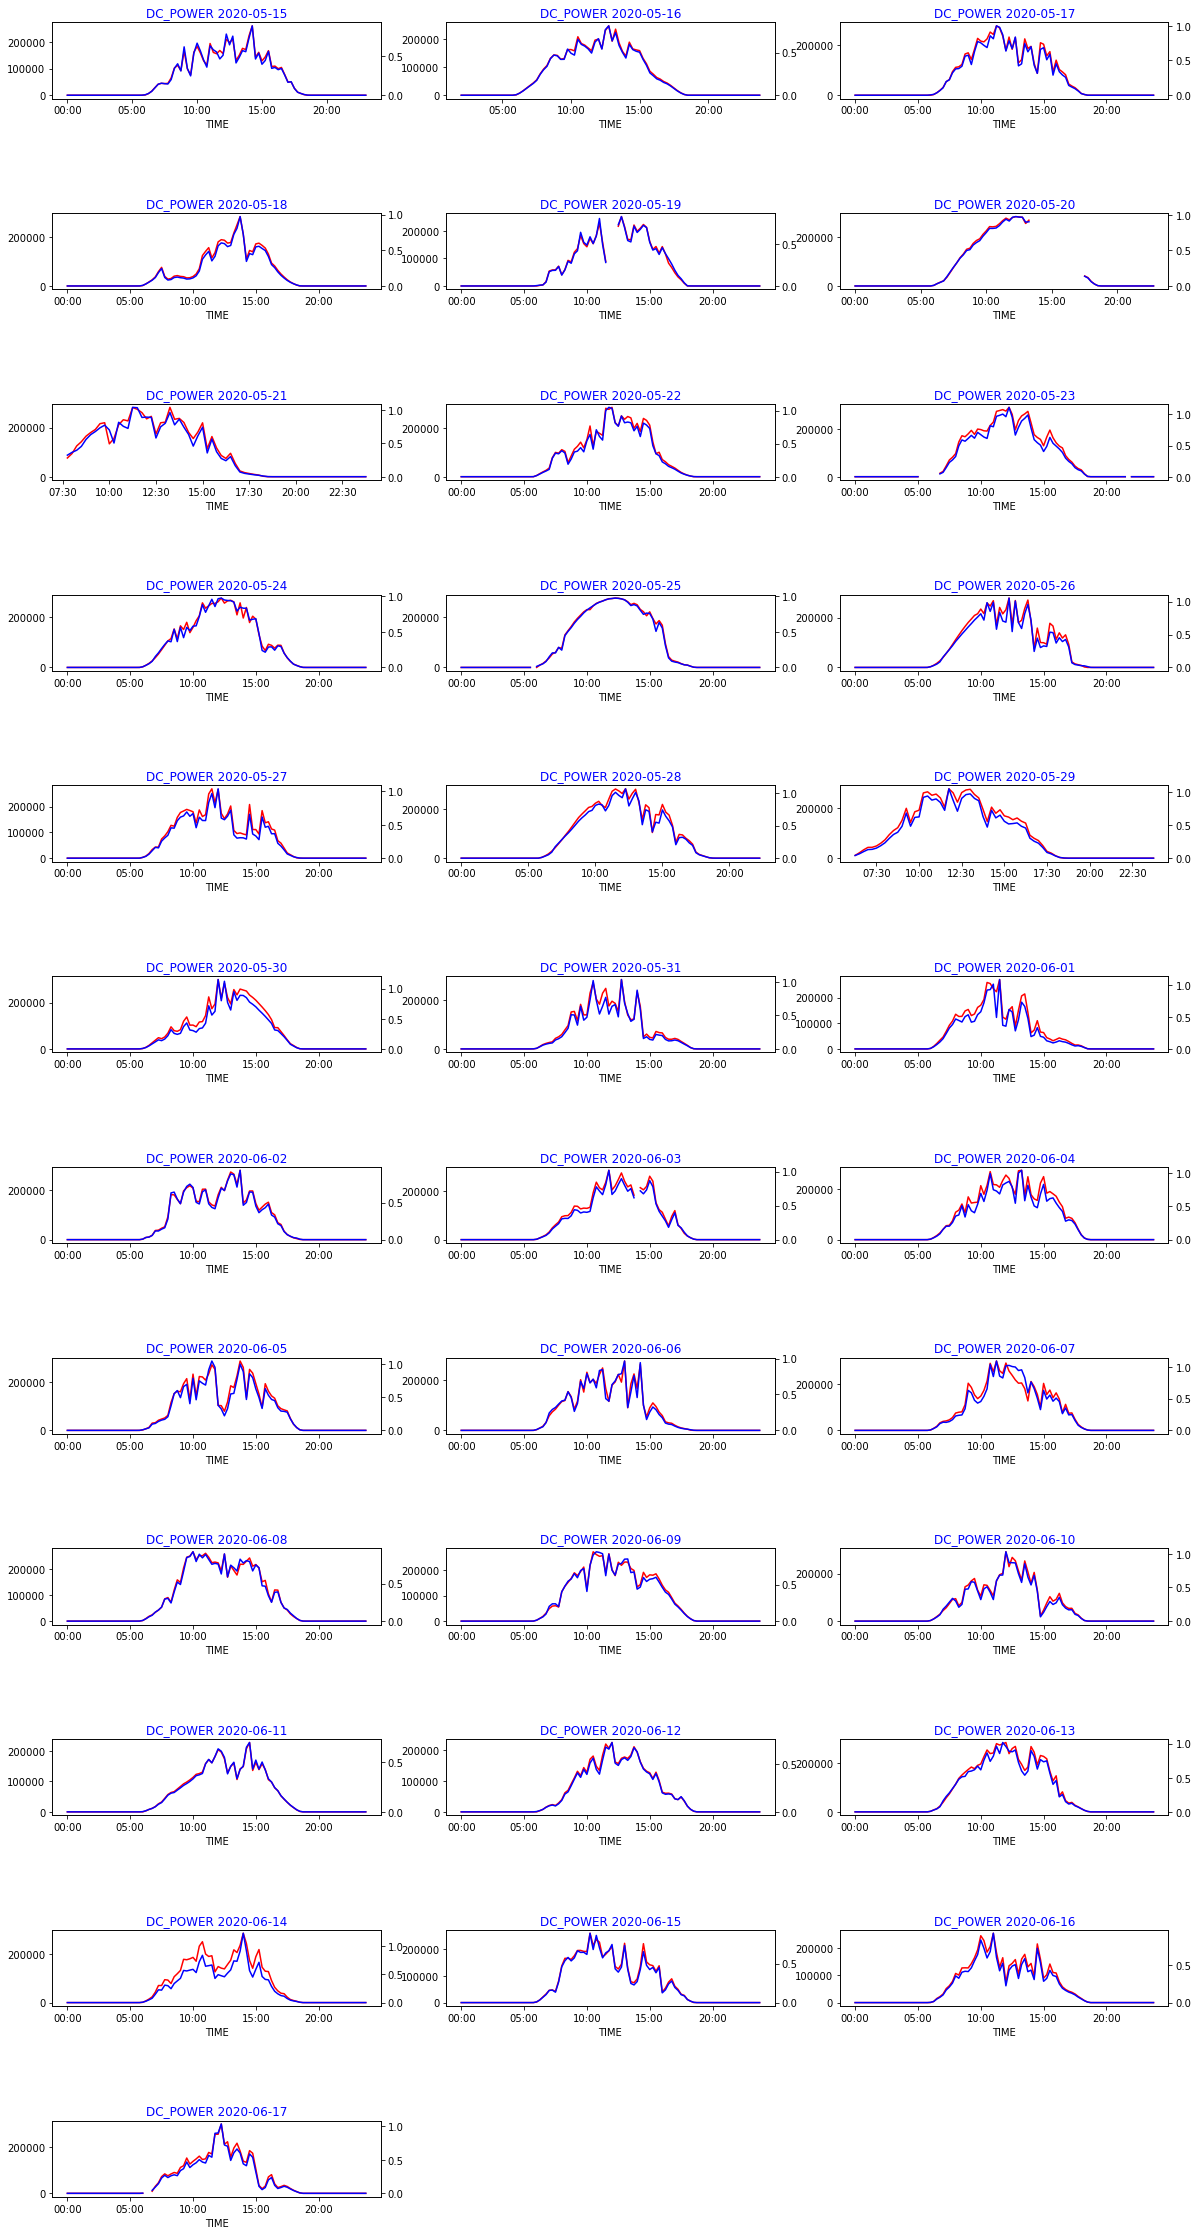

In [27]:
plot_manyplots(12,3,'DC_POWER','IRRADIATION')

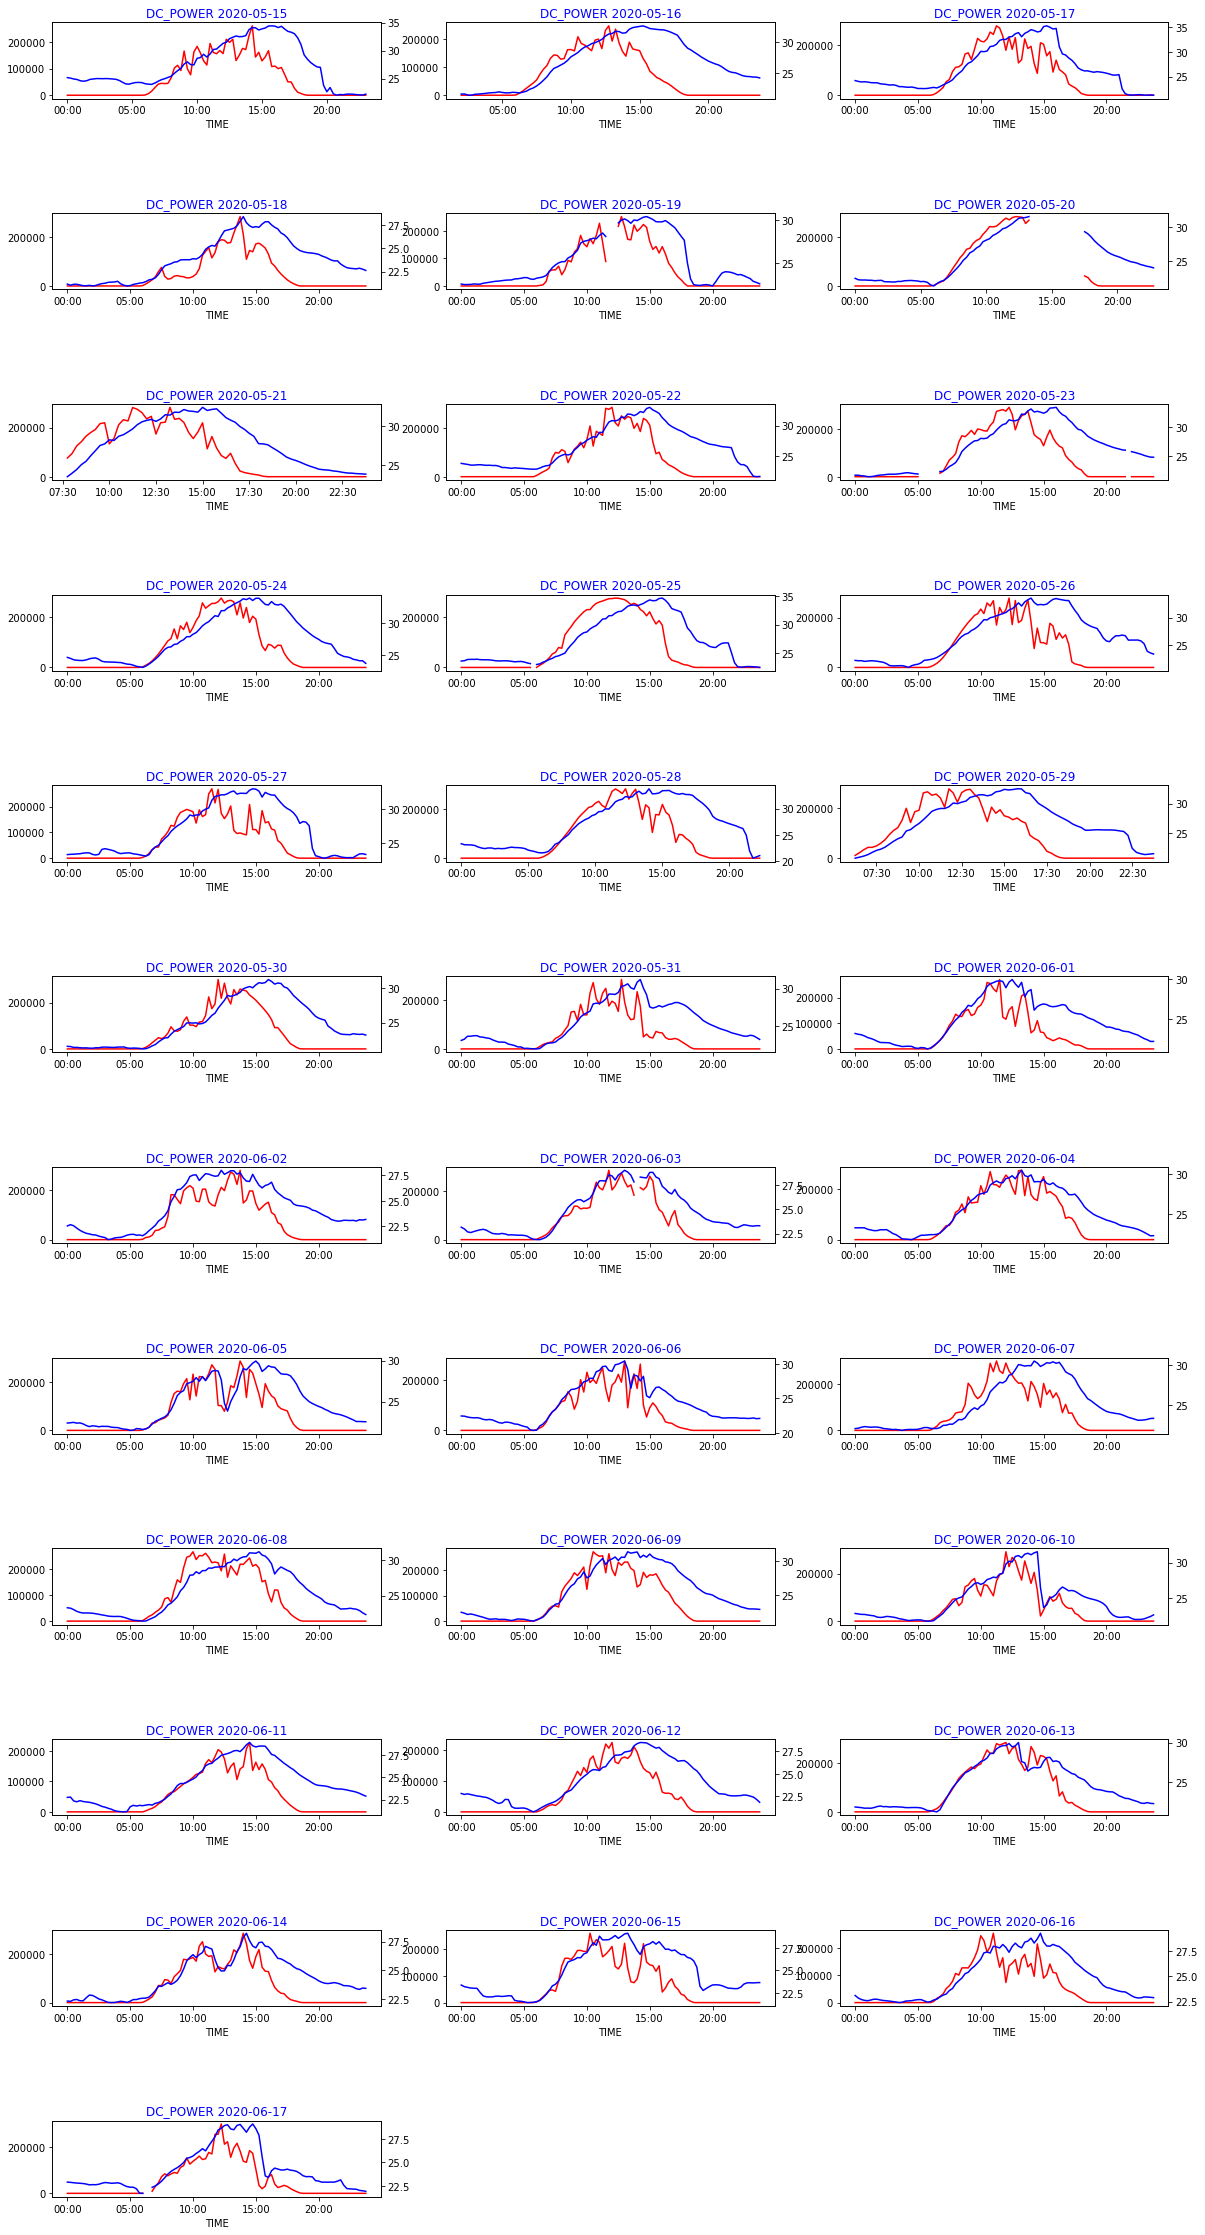

In [28]:
plot_manyplots(12,3,'DC_POWER','AMBIENT_TEMPERATURE')

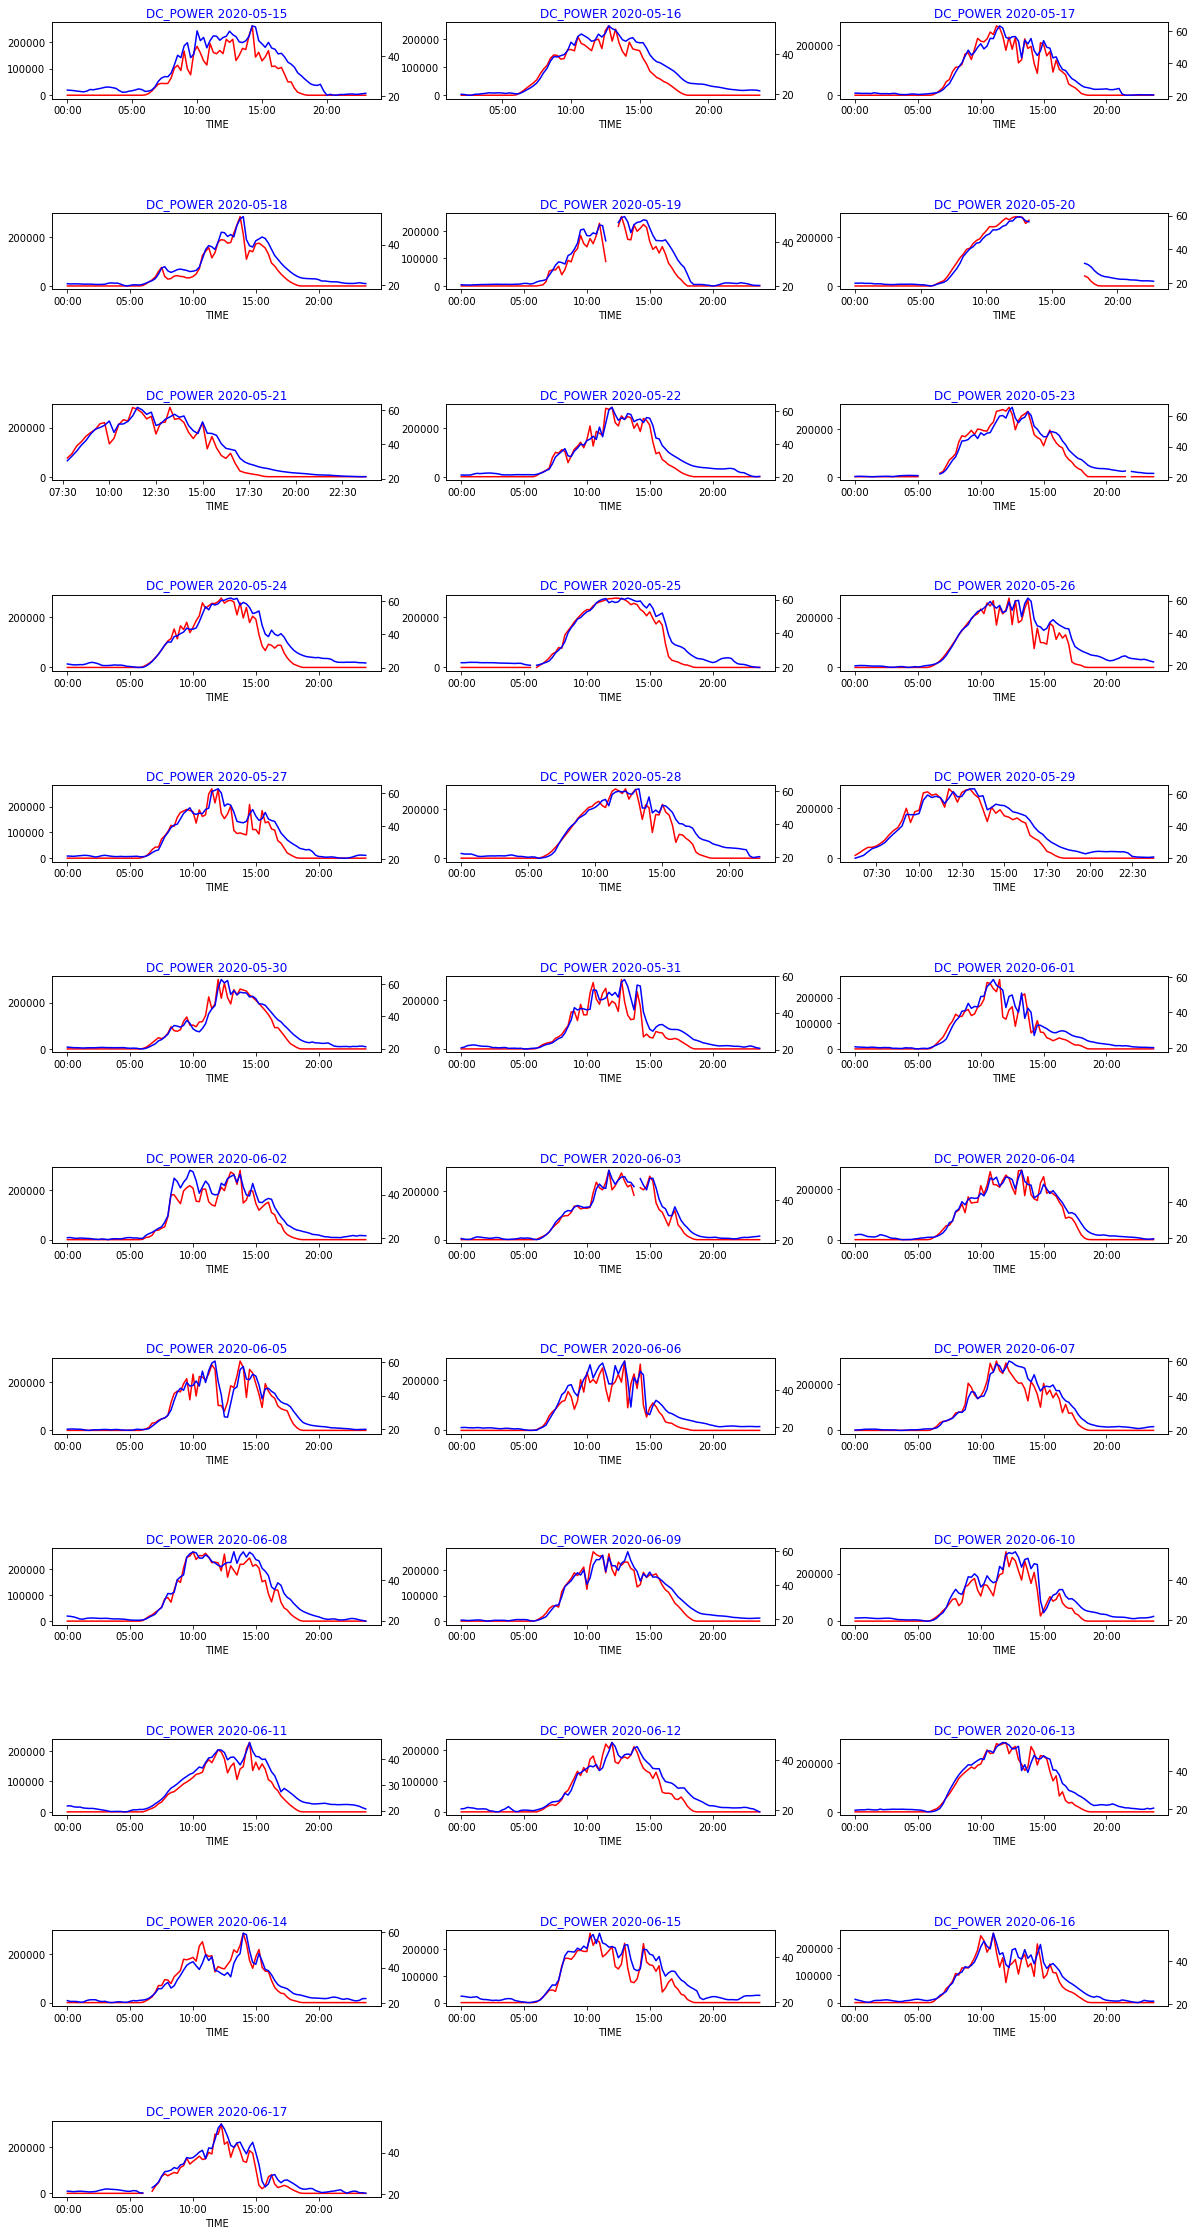

In [29]:
plot_manyplots(12,3,'DC_POWER','MODULE_TEMPERATURE')

In [30]:
df_solar_weatherCor =df_solar_weather.drop(['PLANT_ID_x','PLANT_ID_y','PLANT_ID_y','DAILY_YIELD','TOTAL_YIELD','DATE_','TIME','SOURCE_KEY','DATE_TIME','AC_POWER'], axis =1 )

In [31]:
df_solar_weatherCor.describe()

,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,68560.019625,25.560257,31.175453,0.230103
std,88055.843520,3.351059,12.272685,0.301348
min,0.000000,20.398505,18.140415,0.000000
25%,0.000000,22.739895,21.130249,0.000000
50%,8430.196429,24.680324,24.801971,0.027748
75%,140409.892856,27.941221,41.449481,0.451576
max,298937.785710,35.252486,65.545714,1.221652


<AxesSubplot:>

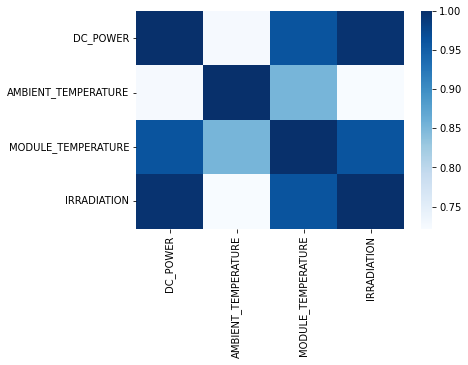

In [32]:
sns.heatmap(df_solar_weatherCor.corr(), cmap = 'Blues')

In [33]:
df_solar_weather.isnull().sum()

DATE_TIME              0
PLANT_ID_x             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
DATE_                  0
TIME                   0
PLANT_ID_y             0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [34]:
df_solar_weather = df_solar_weather.set_index('DATE_TIME')


In [35]:
df_DC_POWER = df_solar_weather['DC_POWER']
df_DC_POWER


DATE_TIME
2020-05-15 00:00:00    0.0
2020-05-15 00:15:00    0.0
2020-05-15 00:30:00    0.0
2020-05-15 00:45:00    0.0
2020-05-15 01:00:00    0.0
                      ... 
2020-06-17 22:45:00    0.0
2020-06-17 23:00:00    0.0
2020-06-17 23:15:00    0.0
2020-06-17 23:30:00    0.0
2020-06-17 23:45:00    0.0
Name: DC_POWER, Length: 3157, dtype: float64

[]

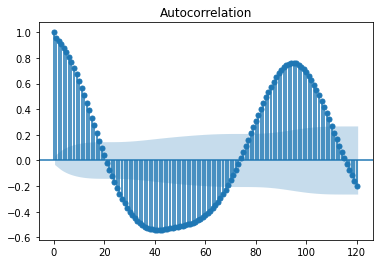

In [36]:
sm.graphics.tsa.plot_acf(df_DC_POWER, lags=120, zero= "ywm")
plt.plot()

[]

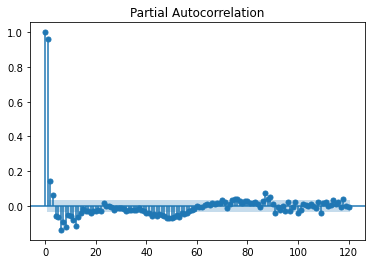

In [37]:
sm.graphics.tsa.plot_pacf(df_DC_POWER, lags=120, zero= "ywm")
plt.plot()

In [46]:
sts.adfuller(df_DC_POWER)

(-13.292258902758807,
 7.322855811414506e-25,
 21,
 3135,
 {'1%': -3.432437611632566,
  '5%': -2.8624623778731086,
  '10%': -2.567261003512842},
 71915.67530761137)

# ARIMA Forecast

In [47]:

model = ARIMA(df_DC_POWER, order=(1,1,1))
model_fit= model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.DC_POWER   No. Observations:                 3156
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -36416.758
Method:                       css-mle   S.D. of innovations          24833.611
Date:                Sat, 20 May 2023   AIC                          72841.516
Time:                        12:05:55   BIC                          72865.744
Sample:                             1   HQIC                         72850.208
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                     0    361.493          0      1.000    -708.512     708.512
ar.L1.D.DC_POWER     0.0582      0.068      0.861      0.389      -0.074       0.191
ma.L1.D.DC_POWER    -0.2298 

In [48]:
model2 = ARIMA(df_DC_POWER, order=(2,1,1))
model2_fit= model2.fit()
print(model2_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.DC_POWER   No. Observations:                 3156
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -36409.986
Method:                       css-mle   S.D. of innovations          24780.306
Date:                Sat, 20 May 2023   AIC                          72829.972
Time:                        12:05:57   BIC                          72860.257
Sample:                             1   HQIC                         72840.837
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                     0    369.122          0      1.000    -723.465     723.465
ar.L1.D.DC_POWER    -0.9066      0.142     -6.382      0.000      -1.185      -0.628
ar.L2.D.DC_POWER    -0.1760 

In [49]:
model3 = ARIMA(df_DC_POWER, order=(3,1,1))
model3_fit= model3.fit()
print(model3_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.DC_POWER   No. Observations:                 3156
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -36377.640
Method:                       css-mle   S.D. of innovations          24527.259
Date:                Sat, 20 May 2023   AIC                          72767.280
Time:                        12:05:59   BIC                          72803.623
Sample:                             1   HQIC                         72780.319
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.794e-06    558.425  -6.79e-09      1.000   -1094.494    1094.494
ar.L1.D.DC_POWER     0.6282      0.029     22.042      0.000       0.572       0.684
ar.L2.D.DC_POWER     0.0764 

In [64]:
model4 = ARIMA(df_DC_POWER, order=(1,1,1))
model4_fit= model4.fit()
print(model4_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:             D.DC_POWER   No. Observations:                 3156
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -36416.758
Method:                       css-mle   S.D. of innovations          24833.611
Date:                Sat, 20 May 2023   AIC                          72841.516
Time:                        12:08:41   BIC                          72865.744
Sample:                             1   HQIC                         72850.208
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                     0    361.493          0      1.000    -708.512     708.512
ar.L1.D.DC_POWER     0.0582      0.068      0.861      0.389      -0.074       0.191
ma.L1.D.DC_POWER    -0.2298 

In [74]:
residuals = pd.DataFrame(model4_fit.resid)

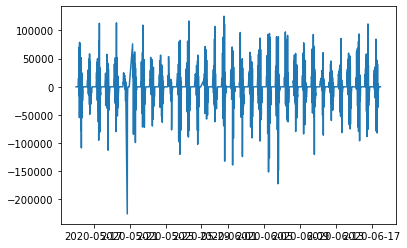

In [75]:
plt.plot(residuals)
plt.show()

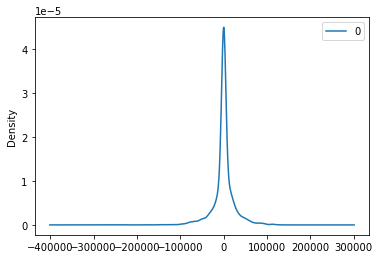

In [76]:
residuals.plot(kind = 'kde')
plt.show()

In [77]:
print(residuals.describe())

                  0
count  3.156000e+03
mean  -5.468571e-14
std    2.483755e+04
min   -2.257142e+05
25%   -2.055431e+03
50%   -5.922507e-12
75%    4.166975e+03
max    1.253031e+05


## ARIMA WALK Forward

In [78]:
x = df_DC_POWER.values
x = x.astype('float32')

In [79]:
size = int(len(x)*0.8)
size

2525

In [80]:
train = x[0:size]
test  = x[size:]

In [81]:
history = [x for x in train]
len(history)

2525

In [82]:
predictions = list()

In [83]:
for t in range(len(test)):
    modelwf = ARIMA(history,order=(4,1,1))
    model_fitwf = modelwf.fit(trend='nc', disp =0)
    valor_predito = model_fitwf.forecast()[0]
    predictions.append(valor_predito)
    valor_real = test[t]
    history.append(valor_real)
    print(valor_predito,  valor_real) 
    

[93002.12739994] 97882.664
[99663.27313995] 104898.625
[106841.13016578] 113149.07
[114718.7079609] 123134.195
[124149.01186042] 125721.195
[128215.06982642] 130335.695
[133212.83006043] 158339.38
[155957.42877779] 171464.62
[169946.90780035] 161230.39
[167029.96498666] 181510.27
[184042.81941512] 204194.2
[202565.02868215] 196331.83
[200619.88863424] 174191.75
[185411.06980048] 127862.375
[144601.60938658] 148878.14
[150531.65029463] 160402.62
[154141.99703986] 106145.14
[113700.90256289] 140998.02
[137623.11305605] 148474.28
[140959.1955761] 206915.0
[190980.864777] 227661.52
[218642.47462582] 135841.67
[157255.18080771] 162871.77
[172092.79120831] 138751.61
[142841.12244232] 157548.92
[153334.63955119] 139426.3
[139983.78041306] 105724.336
[112745.53908602] 97948.625
[100983.99780594] 79283.055
[79787.22376748] 69329.984
[67491.68101449] 52606.645
[51104.59038981] 41500.855
[39016.38102724] 31294.0
[27952.47901157] 21670.857
[17948.85268088] 13898.036
[9949.58423854] 6553.393
[2614.

In [84]:

rmse = sqrt(mean_squared_error(test,predictions))
rmse

22175.121297471425

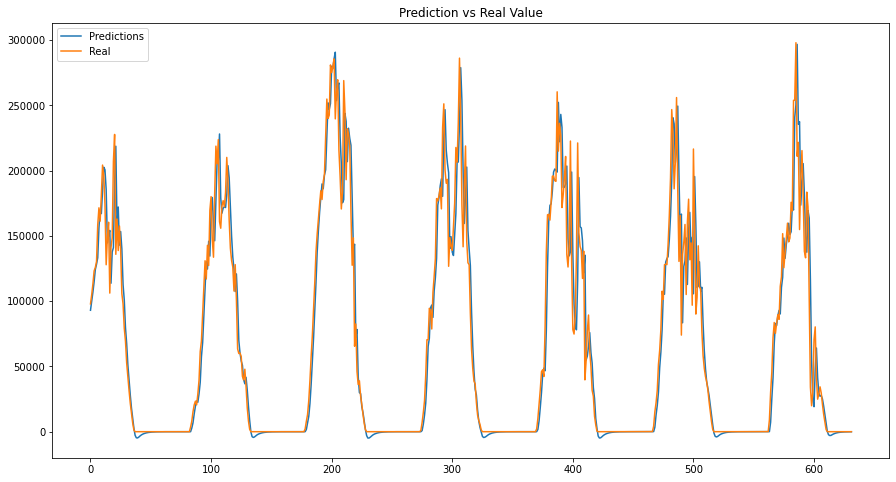

In [117]:
plt.figure(figsize = (15,8))
plt.plot(predictions, label = "Predictions")
plt.plot(test, label ="Real")
plt.title("Prediction vs Real Value")
plt.legend()

plt.show()

# Next steps, apply other statistical models and machine learning models...